In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_dataset_distribution(root_dir):
    bin_counts = {}
    
    # 1. 数据收集 (保持逻辑一致)
    subdirs = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d)) and d.startswith('bin_')]
    for subdir in subdirs:
        length = int(subdir.split('_')[1])
        count = len([f for f in os.listdir(os.path.join(root_dir, subdir)) if f.endswith('.pt')])
        bin_counts[length] = count

    if not bin_counts: return

    # 排序数据
    sorted_lengths = np.array(sorted(bin_counts.keys()))
    counts = np.array([bin_counts[l] for l in sorted_lengths])

    # 2. 设置绘图风格
    sns.set_theme(style="whitegrid")
    plt.figure(figsize=(16, 8))

    # 使用 Seaborn 绘制柱状图，颜色随长度变化
    norm = plt.Normalize(counts.min(), counts.max())
    colors = plt.cm.Blues(norm(counts))
    bars = plt.bar(sorted_lengths, counts, width=100, color=colors, edgecolor='grey', alpha=0.8)

    # 3. 改进 X 轴可读性
    # 每隔 5 个桶显示一个标签，或者根据桶的数量动态调整
    step = max(1, len(sorted_lengths) // 15) 
    plt.xticks(sorted_lengths[::step], rotation=45)

    # 4. 添加趋势线 (核密度估计的变形，用于辅助观察分布形态)
    # 通过插值绘制一条平滑曲线
    from scipy.interpolate import make_interp_spline
    if len(sorted_lengths) > 3:
        x_smooth = np.linspace(sorted_lengths.min(), sorted_lengths.max(), 300)
        spl = make_interp_spline(sorted_lengths, counts, k=3)
        y_smooth = spl(x_smooth)
        plt.plot(x_smooth, np.maximum(y_smooth, 0), color='red', linestyle='--', linewidth=2, label='Trend', alpha=0.6)

    # 5. 添加统计看板 (Text Box)
    total_files = sum(counts)
    avg_len = np.average(sorted_lengths, weights=counts)
    stats_text = f'Total Files: {total_files:,}\nWeighted Avg Length: {avg_len:.1f}'
    plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
                   fontsize=12, verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    plt.xlabel('Sequence Length (Bin Size)', fontsize=12)
    plt.ylabel('Number of Files (.pt)', fontsize=12)
    plt.title('Dataset Binning Distribution Analysis', fontsize=16, fontweight='bold')
    
    # 移除非必要的边框
    sns.despine()
    
    plt.tight_layout()
    plt.show()

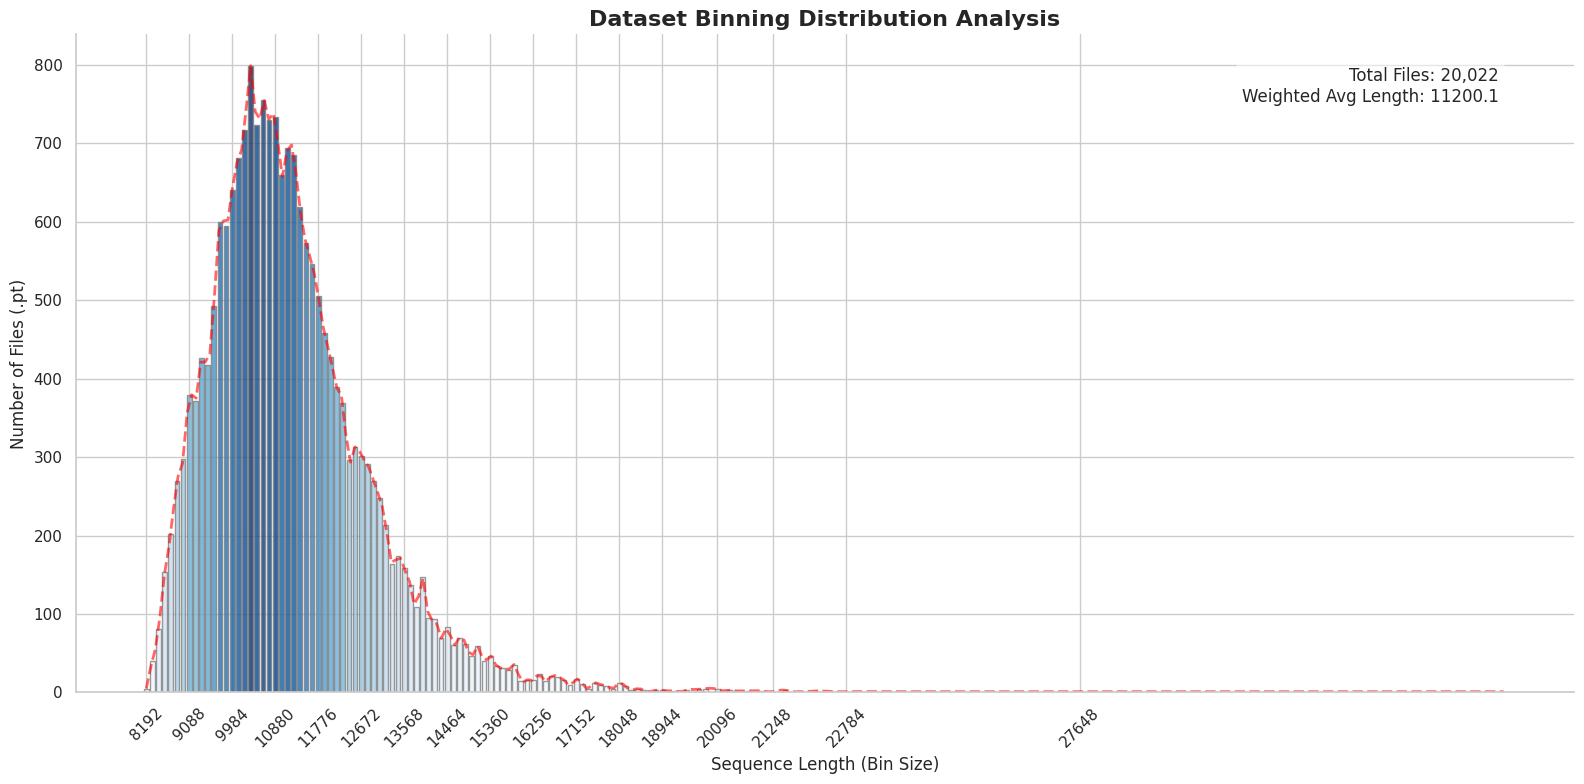

In [4]:
plot_dataset_distribution('/workspace/flow-control/data/prism_layers_pro/qwen_pickle')